#Mpld3: Bringing Matplotlib to the web browser 
An introduction

Mpdl stands for matplotlib and d3 is a popular Javascript library for creating interactive data visualizations for the web.


## Installation  
To install this new package you can run the command below:

In [1]:
!pip install mpld3

/bin/sh: pip: command not found


In [2]:
from IPython.display import HTML
HTML('<iframe src=http://mpld3.github.io width=600 height=400></iframe>')

## Interactive plots with mpld3
Very nice package to play interactiverly with your plots.

And the ability to export the interactive plot to html format and share it around !!

This notebook gives a brief overview of [mpld3](http://mpld3.github.io), a package which allows seamless visualization of matplotlib plots using HTML, Javascript, and the [D3js](http://d3js.org/) package.

One of the nicest parts of the IPython notebook is the ability to embed figures inline with code.  For example, we can quickly create a scatter plot as so:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

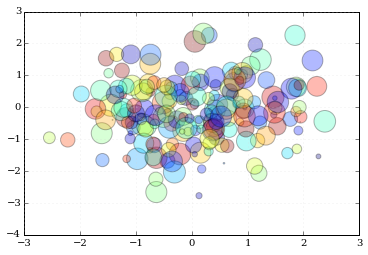

In [4]:
# Scatter points
fig, ax = plt.subplots()
np.random.seed(0)
x, y = np.random.normal(size=(2, 200))
color, size = np.random.random((2, 200))

ax.scatter(x, y, c=color, s=500 * size, alpha=0.3)
ax.grid(color='lightgray', alpha=0.7)
plt.show()

A weakness quickly becomes clear, however: the embedded figure is a simple static PNG image.

This is where mpld3 comes in. Using the simple ``mpld3.display()`` command, we can create a fully interactive visualization of the same plot:

In [5]:
import mpld3
mpld3.display(fig)  # Yes, it is as simple as this !!!

Notice that as you hover over the plot, a toolbar appears in the lower left. This has tools to enable panning and zooming, and a button to reset the view once you've explored the plot.

In [6]:
# multiple subplots, shared axes
fig, ax = plt.subplots(2, 2, figsize=(8, 6),sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.3)

np.random.seed(0)

for axi in ax.flat:
    color = np.random.random(3)
    axi.plot(np.random.random(30), lw=2, c=color)
    axi.set_title("RGB = ({0:.2f}, {1:.2f}, {2:.2f})".format(*color),
                  size=14)
    axi.grid(color='lightgray', alpha=0.7)

mpld3.display(fig)  # Displaying the interactive figure

## Plugins

One of the key features of mpld3 is the plugin framework. Plugins are a way to specify additional interactivity for your plots. A number of plugins are built-in, and it is also possible to define new, custom plugins for nearly limitless interactive behaviors. For example, here is the built-in Linked Brushing plugin that allows exploration of multi-dimensional datasets:

In [7]:
from mpld3 import plugins

fig, ax = plt.subplots(3, 3, figsize=(6, 6))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ax = ax[::-1]

X = np.random.normal(size=(3, 100))
for i in range(3):
    for j in range(3):
        ax[i, j].xaxis.set_major_formatter(plt.NullFormatter())
        ax[i, j].yaxis.set_major_formatter(plt.NullFormatter())
        points = ax[i, j].scatter(X[j], X[i])
        
plugins.connect(fig, plugins.LinkedBrush(points))
mpld3.display(fig)  # Displaying the interactive figure


In [8]:
from mpld3 import plugins

fig, ax = plt.subplots()
points = ax.scatter(np.random.rand(40), np.random.rand(40),
                    s=300, alpha=0.3)

labels = ["Point {0}".format(i) for i in range(40)]
tooltip = plugins.PointLabelTooltip(points, labels)

plugins.connect(fig, tooltip)
mpld3.display(fig)  # Displaying the interactive figure


In [9]:
mpld3.save_html(fig,'mpld3_test.html')
%ls -lah *html

-rw-r--r-- 1 kosack 236K Apr  7 09:58 Sympy Tutorial.html
-rw-r--r-- 1 kosack  15K May  6 12:19 mpld3_test.html


###Now test it
Open this webpage to this how it works.
Click to open your result :  
<a href="mpld3_test.html" target="_blank">mpld3_test.html !</a> 

### User plugins
You can also define your own plugin (javascript):

In [ ]:
# %load http://mpld3.github.io/_downloads/custom_plugin.py
"""
Defining a Custom Plugin
========================
Test the custom plugin demoed on the `Pythonic Perambulations
<http://jakevdp.github.io/blog/2014/01/10/d3-plugins-truly-interactive/>`_
blog.  Hover over the points to see the associated sinusoid.
Use the toolbar buttons at the bottom-right of the plot to enable zooming
and panning, and to reset the view.
"""
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import mpld3
from mpld3 import plugins, utils


class LinkedView(plugins.PluginBase):
    """A simple plugin showing how multiple axes can be linked"""

    JAVASCRIPT = """
    mpld3.register_plugin("linkedview", LinkedViewPlugin);
    LinkedViewPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    LinkedViewPlugin.prototype.constructor = LinkedViewPlugin;
    LinkedViewPlugin.prototype.requiredProps = ["idpts", "idline", "data"];
    LinkedViewPlugin.prototype.defaultProps = {}
    function LinkedViewPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    LinkedViewPlugin.prototype.draw = function(){
      var pts = mpld3.get_element(this.props.idpts);
      var line = mpld3.get_element(this.props.idline);
      var data = this.props.data;

      function mouseover(d, i){
        line.data = data[i];
        line.elements().transition()
            .attr("d", line.datafunc(line.data))
            .style("stroke", this.style.fill);
      }
      pts.elements().on("mouseover", mouseover);
    };
    """

    def __init__(self, points, line, linedata):
        if isinstance(points, matplotlib.lines.Line2D):
            suffix = "pts"
        else:
            suffix = None

        self.dict_ = {"type": "linkedview",
                      "idpts": utils.get_id(points, suffix),
                      "idline": utils.get_id(line),
                      "data": linedata}

fig, ax = plt.subplots(2)

# scatter periods and amplitudes
np.random.seed(0)
P = 0.2 + np.random.random(size=20)
A = np.random.random(size=20)
x = np.linspace(0, 10, 100)
data = np.array([[x, Ai * np.sin(x / Pi)]
                 for (Ai, Pi) in zip(A, P)])
points = ax[1].scatter(P, A, c=P + A,
                       s=200, alpha=0.5)
ax[1].set_xlabel('Period')
ax[1].set_ylabel('Amplitude')

# create the line object
lines = ax[0].plot(x, 0 * x, '-w', lw=3, alpha=0.5)
ax[0].set_ylim(-1, 1)

ax[0].set_title("Hover over points to see lines")

# transpose line data and add plugin
linedata = data.transpose(0, 2, 1).tolist()
plugins.connect(fig, LinkedView(points, lines[0], linedata))

mpld3.show()



Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [06/May/2015 12:19:07] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2015 12:19:07] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2015 12:19:07] "GET /mpld3.js HTTP/1.1" 200 -


###A cool example on the Fermi catalog

You can do some more complex examples to explore your results (e.g. catalogs).

By clicking on the link below you can see what I recently did to visualize the Fermi 3FGL catalog.
For each gamma-ray source, you have a pop-up window that will show the source properties: 

<a href="files/3FGL-interactive.html" target="_blank"> 3FGL-interactive.html </a> 

